In [1]:
# ! [ -e /content ] && pip install -Uqq fastbook


In [40]:
import fastbook
# fastbook.setup_book()

In [41]:
from fastbook import *
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import PIL
import os

In [27]:

def search_images(term,max_images = 30):

  """term: object we are searching images for
      max_images : max no. of images we need"""

  print(f"Searching for '{term}'")
  return L(ddg_images(term, max_results=max_images)).itemgot('image')



Searching for 'weapon'


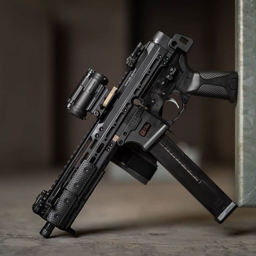

In [28]:
#Fetching an image and showing it.

urls = search_images('weapon', max_images=1)
# urls[0]
dest = 'weapon22.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'human holding weapon'


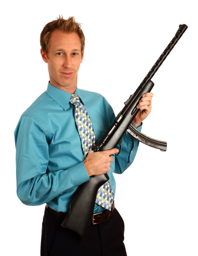

In [29]:
#fetching for different search 


download_url(search_images('human holding weapon')[3], 'human_weapon1.jpg', show_progress=False)
im = Image.open('human_weapon1.jpg')
im.to_thumb(256,256)


In [43]:
searches = 'weapons','human holding weapon'
path = Path('holding_weapon_or_not')
from time import sleep

In [30]:


for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} indoor photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} outdoor photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'weapons photo'
Searching for 'weapons indoor photo'
Searching for 'weapons outdoor photo'
Searching for 'human holding weapon photo'
Searching for 'human holding weapon indoor photo'
Searching for 'human holding weapon outdoor photo'


In [42]:
#check if images are named correctly if not rename downloaded images

folder = "holding_weapon_or_not"
path_ = "/Users/dikshapaliwal/Deep-Learning-Mini-Project/"

def rename_images(folder,path):

    for count, filename in enumerate(os.listdir(folder)):
        for count, image_name in enumerate(os.listdir(path + folder + "/" +str(filename))):

            if str(filename) in str(image_name):
                print("already renamed")
                return 
            else: 
                # print(f"{count} , {image_name}")

                dst = f"{str(filename)}_{str(count)}.jpg"
                src =f"{folder}/{filename}/{image_name}"  # foldername/filename, if .py file is outside folder
                dst =f"{folder}/{filename}/{dst}"

                # rename() function will
                # rename all the files
                os.rename(src, dst)

rename_images(folder,path_)



already renamed


holding_weapon_or_not


In [50]:
def is_holdingweapon(x):
    return parent_label(x)

# is_holdingweapon("/Users/dikshapaliwal/Deep-Learning-Mini-Project/holding_weapon_or_not/human holding weapon photos/human holding weapon_5.jpg")

Training Model

In [44]:
#Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

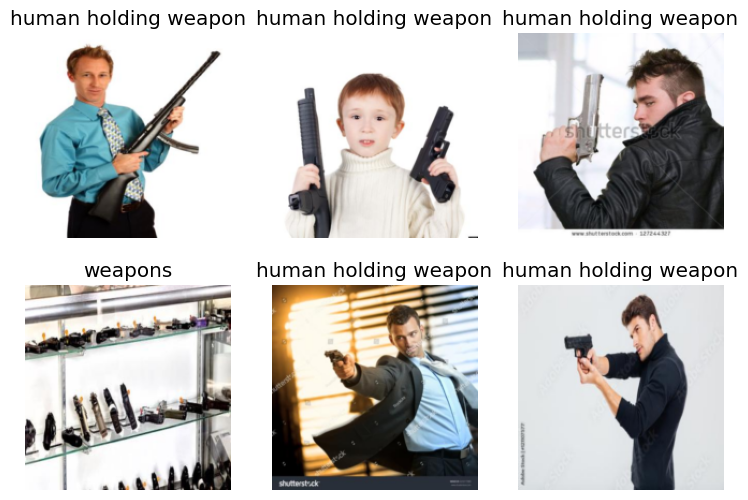

In [51]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=is_holdingweapon,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [52]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/Users/dikshapaliwal/.pyenv/versions/3.9.16/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/dikshapaliwal/.pyenv/versions/3.9.16/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.106523,0.398252,0.147059,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.328579,0.225339,0.117647,00:01
1,0.283710,0.265916,0.088235,00:01
2,0.231103,0.296529,0.117647,00:01


In [53]:
learn.export('weapon_finder_model.pkl')

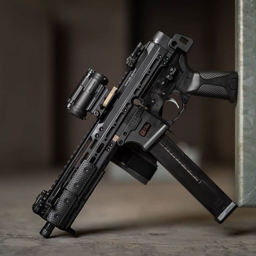

In [54]:
image = Image.open('weapon22.jpg')
# Create a PIL Image object from the opened image
pil_image = image.copy()
pil_image.to_thumb(256,256)

# Close the image file
# image.close()


In [55]:
is_holding_weapon,_,probs = learn.predict(pil_image)
print(f"This is a: {is_holding_weapon} image.")
print(f"Probability of human holding a weapon': {probs[0]:.4f}")

This is a: weapons image.
Probability of human holding a weapon': 0.0000
